# Log Analysis Script

## Importing the libraries

In [20]:
# Import required libraries
import re
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # For advanced plotting aesthetics



## Starting with the Functions

### Function 1

In [21]:
# Function 1: Parse the log file
def parse_log_file(log_file_path):
    """
    1️⃣ Parses the log file to extract:
       - IP addresses (Who's knocking on the door?)
       - Endpoints (What are they asking for?)
       - Failed logins (Who's being sneaky?)
    2️⃣ It does this using REGEX (A language to talk to logs).

    Args:
        log_file_path (str): Path to the log file
    
    Returns:
        Tuple: (List of IPs, List of Endpoints, Dictionary of Failed Logins)
    """
    ip_addresses = []
    endpoints = []
    failed_logins = defaultdict(int)  # Keeps track of failed logins per IP

    # Define the Regex Patterns (The Secret Decoder Rings)
    ip_pattern = r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})'  # Pattern for IPv4 addresses
    endpoint_pattern = r'\"[A-Z]+\s(\/[^\s]*)\sHTTP\/'  # Pattern for endpoints (e.g., /home)
    failed_login_pattern = r'(401|Invalid credentials)'  # Pattern for failed logins

    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # Extract IP Address
                ip_match = re.search(ip_pattern, line)
                if ip_match:
                    ip_addresses.append(ip_match.group(1))

                # Extract Endpoint
                endpoint_match = re.search(endpoint_pattern, line)
                if endpoint_match:
                    endpoints.append(endpoint_match.group(1))

                # Detect Failed Logins
                if re.search(failed_login_pattern, line) and ip_match:
                    failed_logins[ip_match.group(1)] += 1

    except FileNotFoundError:
        print(f"⚠️ Error: Log file {log_file_path} not found. Double-check the path.")
    except Exception as e:
        print(f"❌ An error occurred while processing the log file: {e}")

    return ip_addresses, endpoints, failed_logins


### Function 2

In [22]:
# Function 2: Save results to a CSV file
def save_results_to_csv(ip_requests, most_accessed_endpoint, suspicious_ips, output_file):
    """
    Saves the results to a CSV file with organized sections.

    Args:
        ip_requests (Counter): Counts of requests per IP
        most_accessed_endpoint (tuple): Most accessed endpoint and count
        suspicious_ips (dict): Suspicious IPs and failed login counts
        output_file (str): Name of the output CSV file
    """
    try:
        with open(output_file, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)

            # Section 1: Requests per IP
            writer.writerow(["Requests per IP"])
            writer.writerow(["IP Address", "Request Count"])
            for ip, count in ip_requests.items():
                writer.writerow([ip, count])
            writer.writerow([])  # Add a blank line for readability

            # Section 2: Most Accessed Endpoint
            writer.writerow(["Most Accessed Endpoint"])
            writer.writerow(["Endpoint", "Access Count"])
            writer.writerow([most_accessed_endpoint[0], most_accessed_endpoint[1]])
            writer.writerow([])

            # Section 3: Suspicious Activity
            writer.writerow(["Suspicious Activity Detected"])
            writer.writerow(["IP Address", "Failed Login Count"])
            for ip, count in suspicious_ips.items():
                writer.writerow([ip, count])

        print(f"✅ Results successfully saved to {output_file}")

    except Exception as e:
        print(f"❌ An error occurred while saving to CSV: {e}")


### Visualisations

In [23]:
def plots(ip_requests, endpoint_counts, suspicious_ips):
    """
    Creates insightful data science-inspired visualizations:
    - Heatmap for top IPs vs. their request counts.
    - Distribution of endpoint accesses.
    - Horizontal bar plot for suspicious activity.

    Args:
        ip_requests (Counter): Requests per IP
        endpoint_counts (Counter): Counts of accessed endpoints
        suspicious_ips (dict): Suspicious IPs with failed login counts
    """
    # Top 10 IPs by Request Count (Heatmap Style)
    ip_data = pd.DataFrame(ip_requests.most_common(10), columns=["IP Address", "Request Count"])
    plt.figure(figsize=(8, 6))
    sns.heatmap(ip_data.set_index("IP Address"), annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
    plt.title("Heatmap: Top 10 IPs by Request Count")
    plt.ylabel("IP Address")
    plt.xlabel("Request Count")
    plt.tight_layout()
    plt.show()

    # Distribution of Endpoint Access Counts
    endpoint_data = pd.DataFrame(endpoint_counts.most_common(), columns=["Endpoint", "Access Count"])
    plt.figure(figsize=(12, 6))
    sns.histplot(endpoint_data["Access Count"], kde=True, bins=20, color="steelblue")
    plt.title("Distribution of Endpoint Access Counts")
    plt.xlabel("Access Count")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # Suspicious IPs Horizontal Bar Plot
    if suspicious_ips:
        suspicious_data = pd.DataFrame(suspicious_ips.items(), columns=["IP Address", "Failed Login Count"])
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x="Failed Login Count",
            y="IP Address",
            data=suspicious_data,
            palette="Reds_r",
            orient="h"
        )
        plt.title("Horizontal Bar Plot: Suspicious IPs with Failed Login Attempts")
        plt.xlabel("Failed Login Count")
        plt.ylabel("IP Address")
        plt.tight_layout()
        plt.show()
    else:
        print("No suspicious IPs to plot.")


## Main Prompt Execution

In [24]:
# Main Program Execution
if __name__ == "__main__":
    # Log file path (Make sure it's in the same directory or provide the full path)
    log_file = "sample.log"
    output_csv = "log_analysis_results.csv"

    # Step 1: Parse the log file (Think of it as interrogating the log)
    ip_addresses, endpoints, failed_logins = parse_log_file(log_file)

    # Step 2: Count Requests per IP
    ip_request_counts = Counter(ip_addresses)
    print("📊 Requests per IP Address:")
    for ip, count in ip_request_counts.most_common():
        print(f"{ip:20} {count}")

    # Step 3: Identify the Most Accessed Endpoint
    endpoint_counts = Counter(endpoints)
    most_accessed_endpoint = endpoint_counts.most_common(1)[0] if endpoint_counts else ("None", 0)
    print(f"\n📍 Most Accessed Endpoint:\n{most_accessed_endpoint[0]} (Accessed {most_accessed_endpoint[1]} times)")

    # Step 4: Detect Suspicious Activity
    threshold = 10  # Threshold for failed login attempts
    suspicious_ips = {ip: count for ip, count in failed_logins.items() if count > threshold}
    print("\n🚨 Suspicious Activity Detected:")
    if suspicious_ips:
        for ip, count in suspicious_ips.items():
            print(f"{ip:20} {count}")
    else:
        print("No suspicious activity detected.")

    # Step 5: Save Results to a CSV File
    save_results_to_csv(ip_request_counts, most_accessed_endpoint, suspicious_ips, output_csv)


📊 Requests per IP Address:
203.0.113.5          8
198.51.100.23        8
192.168.1.1          7
10.0.0.2             6
192.168.1.100        5

📍 Most Accessed Endpoint:
/login (Accessed 13 times)

🚨 Suspicious Activity Detected:
No suspicious activity detected.
❌ An error occurred while saving to CSV: name 'csv' is not defined


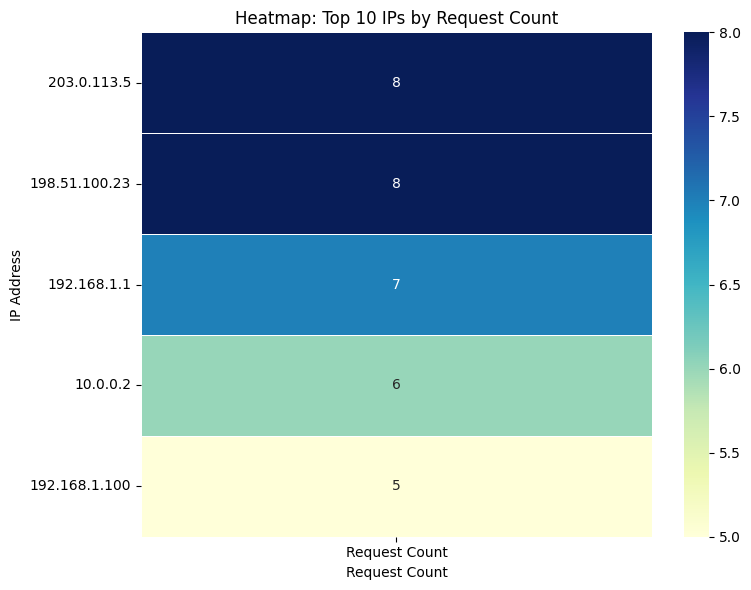

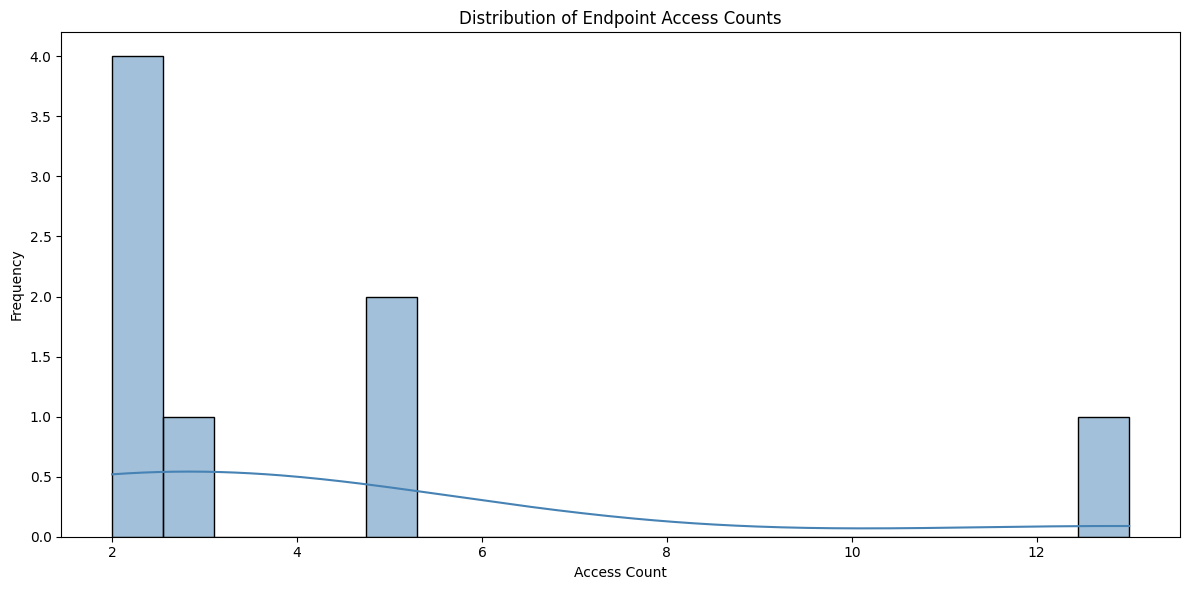

No suspicious IPs to plot.


In [25]:
# Assuming ip_request_counts, endpoint_counts, suspicious_ips are available as inputs
plots(ip_request_counts, endpoint_counts, suspicious_ips)